In [82]:
# -*- coding: utf-8 -*-
"""
Created on Sat september 24 10:12:15 2016
@author: Sidon
"""
%matplotlib inline
import pandas as pd
import numpy as np
from collections import OrderedDict
from tabulate import tabulate, tabulate_formats
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

# Load from CSV
data1 = pd.read_csv('~/dev/coursera/gapminder.csv', skip_blank_lines=True,
                    usecols=['country','incomeperperson','lifeexpectancy'])
 
# Rename columns for clarity                                    
data1.columns = ['country','income','life']

# Variables Descriptions
ALCOHOL = "2008 income consumption per adult (liters, age 15+)"
LIFE = "2011 life expectancy at birth (years)"

# converting to numeric values and parsing (numeric invalids=NaN)
for dt in ('income','life') :
   data1[dt] = pd.to_numeric(data1[dt], 'errors=coerce') 

# Remove rows with nan values
data1 = data1.dropna(axis=0, how='any')

# Copy dataframe for univariate categorical variables
data2 = data1.copy()

In [83]:
# Measures for center and graph
measures = OrderedDict()
measures['Mean'] = data1.income.mean()

# New var for center the mean
data1['income_center'] = data1.income-measures['Mean']

measures['Center'] = data1.income_center.mean()
measures['cMin'] = data1.income_center.min()
measures['cMax'] = data1.income_center.max()
measures['Min life'] = data1.life.min()
measures['Max life'] = data1.life.max()

In [84]:
# Table shows measures
print (tabulate([measures], tablefmt='pipe', headers='keys'))

|    Mean |      Center |     cMin |    cMax |   Min life |   Max life |
|--------:|------------:|---------:|--------:|-----------:|-----------:|
| 7327.44 | -1.1007e-12 | -7223.67 | 44974.1 |     47.794 |     83.394 |


In [85]:
print ("OLS regression model")
reg1 = smf.ols('life ~ income_center', data=data1).fit()
print (reg1.summary())

OLS regression model
                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     98.65
Date:                Sat, 24 Sep 2016   Prob (F-statistic):           1.07e-18
Time:                        13:57:02   Log-Likelihood:                -610.14
No. Observations:                 176   AIC:                             1224.
Df Residuals:                     174   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        69.6547 

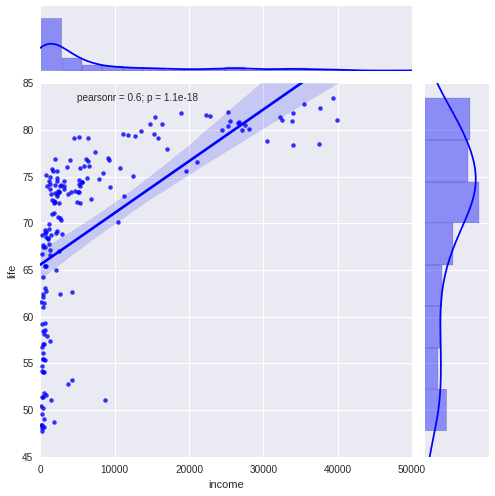

In [88]:
plot1 = sn.jointplot("income_center", "life", data=data1, kind="reg",
                  xlim=(-10000,50000), ylim=(45, 85), color="b", size=7)
plt.show()